<a href="https://colab.research.google.com/github/Parths131/arima-odisha/blob/main/arima_implementation_fta_in_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving historical-data-of-odisha.csv to historical-data-of-odisha.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [ ]:
path = '/content/historical-data-of-odisha.csv'
df = pd.read_csv(path)

In [ ]:
order = (3, 2, 0)

In [ ]:
df = df[:17]

In [ ]:
df_excluded = df[['Year', 'FTA In India']]

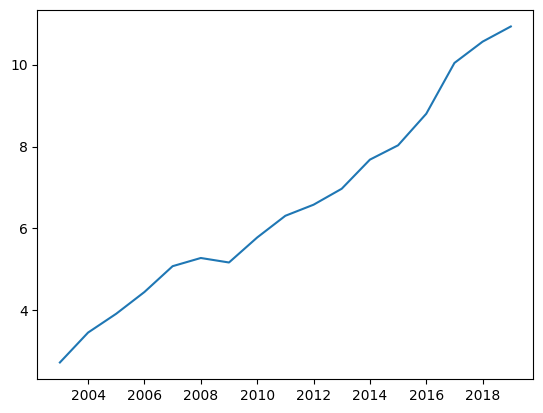

In [ ]:
plt.plot(df_excluded['Year'], df_excluded['FTA In India'])

In [ ]:
df_train  = df_excluded[:14]
df_test = df_excluded[14:]

In [ ]:
df_excluded

,Year,FTA In India
0,2003,2.73
1,2004,3.46
2,2005,3.92
3,2006,4.45
4,2007,5.08
5,2008,5.28
6,2009,5.17
7,2010,5.78
8,2011,6.31
9,2012,6.58


In [ ]:
testing_range = pd.date_range(start=datetime(2017, 1, 1), end=datetime(2019, 12, 31), freq='YS')

model = ARIMA(df_train['FTA In India'], order=order)
model_fit = model.fit()

testing = model_fit.forecast(steps=len(testing_range))

testing_df = pd.DataFrame({'Year': testing_range.year, 'FTA In India': testing})

print(testing_df)

    Year  FTA In India
14  2017      9.547120
15  2018     10.064961
16  2019     10.706071


In [ ]:
rmse = np.sqrt(np.mean((df_test['FTA In India'] - testing_df['FTA In India']) ** 2))

mae = np.mean(np.abs(df_test['FTA In India'] - testing_df['FTA In India']))

rmse, mae

(0.4235324727540235, 0.403949670717435)

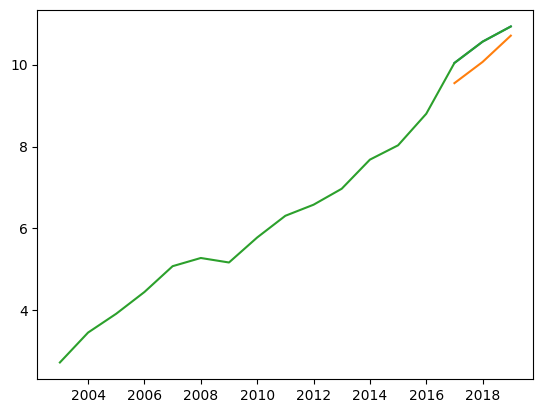

In [ ]:
plt.plot(df_test['Year'], df_test['FTA In India'], label='Actual')
plt.plot(testing_df['Year'], testing_df['FTA In India'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['FTA In India'], label='Predicted')

In [ ]:
forecast_range = pd.date_range(start=datetime(2020, 1, 1), end=datetime(2049, 12, 31), freq='YS')

model = ARIMA(df_excluded['FTA In India'], order=order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df = pd.DataFrame({'Year': forecast_range.year, 'FTA In India': predictions})

print(predictions_df)

    Year  FTA In India
17  2020     11.908799
18  2021     12.683359
19  2022     13.087513
20  2023     13.842598
21  2024     14.704904
22  2025     15.237878
23  2026     15.857737
24  2027     16.689552
25  2028     17.343818
26  2029     17.924656
27  2030     18.682044
28  2031     19.405296
29  2032     20.008479
30  2033     20.700472
31  2034     21.440155
32  2035     22.085851
33  2036     22.743010
34  2037     23.467562
35  2038     24.148271
36  2039     24.799104
37  2040     25.499614
38  2041     26.197710
39  2042     26.858296
40  2043     27.540191
41  2044     28.240316
42  2045     28.914376
43  2046     29.587710
44  2047     30.281756
45  2048     30.965643
46  2049     31.638631


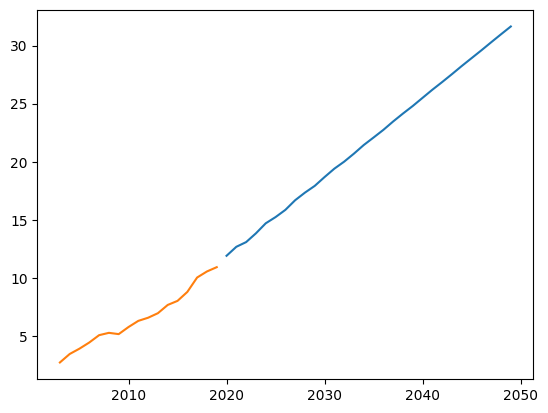

In [ ]:
plt.plot(predictions_df['Year'], predictions_df['FTA In India'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['FTA In India'], label='Predicted')

In [ ]:
testing_seq = df_train.copy()

model = ARIMA(testing_seq['FTA In India'], order=order)
model_fit = model.fit()

for testing_year in testing_range:

    pred = model_fit.forecast(steps=1)

    testing_seq = pd.concat([testing_seq, pd.DataFrame({'Year': [testing_year.year], 'FTA In India': [pred.iloc[0]]})], ignore_index=True)

    model = ARIMA(testing_seq['FTA In India'], order=order)
    model_fit = model.fit()

print(testing_seq)

    Year  FTA In India
0   2003      2.730000
1   2004      3.460000
2   2005      3.920000
3   2006      4.450000
4   2007      5.080000
5   2008      5.280000
6   2009      5.170000
7   2010      5.780000
8   2011      6.310000
9   2012      6.580000
10  2013      6.970000
11  2014      7.680000
12  2015      8.030000
13  2016      8.800000
14  2017      9.547120
15  2018     10.062411
16  2019     10.703438


In [ ]:
testing_seq = testing_seq.iloc[14:]

In [ ]:
df_test = df_test.reset_index(drop=True)
testing_seq = testing_seq.reset_index(drop=True)

In [ ]:
rmse = np.sqrt(np.mean((df_test['FTA In India'] - testing_seq['FTA In India']) ** 2))

mae = np.mean(np.abs(df_test['FTA In India'] - testing_seq['FTA In India']))

rmse, mae

(0.4249925416862581, 0.4056769797604887)

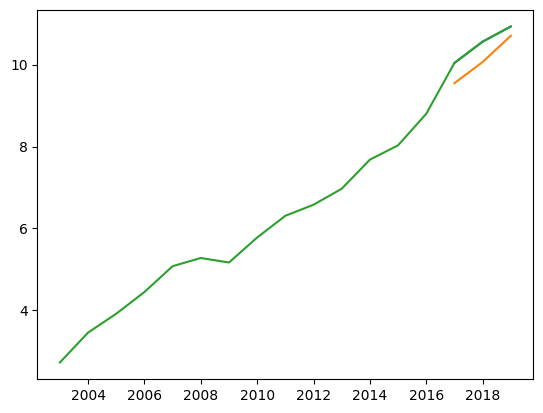

In [ ]:
plt.plot(df_test['Year'], df_test['FTA In India'], label='Actual')
plt.plot(testing_seq['Year'], testing_seq['FTA In India'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['FTA In India'], label='Predicted')

In [ ]:
predictions_seq = df_excluded.copy()

forecast_range = pd.date_range(start=datetime(2020, 1, 1), end=datetime(2049, 12, 31), freq='YS')
model = ARIMA(predictions_seq['FTA In India'], order=order)
model_fit = model.fit()

for forecast_year in forecast_range:

    pred = model_fit.forecast(steps=1)

    predictions_seq = pd.concat([predictions_seq, pd.DataFrame({'Year': [forecast_year.year], 'FTA In India': [pred.iloc[0]]})], ignore_index=True)

    model = ARIMA(predictions_seq['FTA In India'], order=order)
    model_fit = model.fit()

print(predictions_seq)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    Year  FTA In India
0   2003      2.730000
1   2004      3.460000
2   2005      3.920000
3   2006      4.450000
4   2007      5.080000
5   2008      5.280000
6   2009      5.170000
7   2010      5.780000
8   2011      6.310000
9   2012      6.580000
10  2013      6.970000
11  2014      7.680000
12  2015      8.030000
13  2016      8.800000
14  2017     10.040000
15  2018     10.560000
16  2019     10.930000
17  2020     11.908799
18  2021     12.682184
19  2022     13.080716
20  2023     13.837998
21  2024     14.705835
22  2025     15.228967
23  2026     15.844569
24  2027     16.688632
25  2028     17.337871
26  2029     17.905256
27  2030     18.673538
28  2031     19.402130
29  2032     19.988437
30  2033     20.682308
31  2034     21.435262
32  2035     22.069082
33  2036     22.717723
34  2037     23.456060
35  2038     24.134654
36  2039     24.771330
37  2040     25.479378
38  2041     26.183984
39  2042     26.831633
40  2043     27.512423
41  2044     28.222582
42  2045   

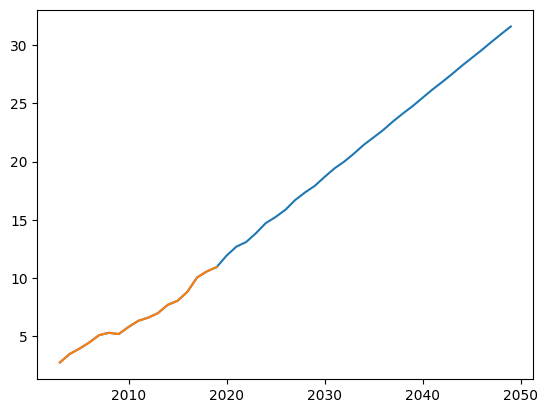

In [ ]:
plt.plot(predictions_seq['Year'], predictions_seq['FTA In India'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['FTA In India'], label='Predicted')